* http://stackoverflow.com/questions/2224602/parsing-table-with-beautifulsoup-and-write-in-text-file
* http://www.canbike.org/information-technology/yahoo-finance-url-download-to-a-csv-file.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html
* https://ipython.org/ipython-doc/3/interactive/magics.html

In [1]:
%matplotlib inline

from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import requests
import re
import seaborn as sns

In [2]:
r = requests.get('https://www.asx300list.com/').content
print(r)

b'<!DOCTYPE html>\n<html lang="en-AU" prefix="og: http://ogp.me/ns#">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="profile" href="http://gmpg.org/xfn/11">\n    <link rel="pingback" href="https://www.asx300list.com/xmlrpc.php">\n\n    <title>ASX 300 List - Data for ASX Top 300 Companies</title>\n\n<!-- This site is optimized with the Yoast SEO plugin v4.0.2 - https://yoast.com/wordpress/plugins/seo/ -->\n<meta name="description" content="Download an up-to-date list of Australia&#039;s top 300 companies. ASX 300 constituent data includes GICS Sectors, market cap and index weighting."/>\n<meta name="robots" content="noodp"/>\n<link rel="canonical" href="https://www.asx300list.com/" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="website" />\n<meta property="og:title" content="ASX 300 List - Data for ASX Top 300 Companies" />\n<meta property="og:description" content="Down

In [3]:
soup = BeautifulSoup(r, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-AU" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8">
   <meta content="width=device-width, initial-scale=1.0" name="viewport">
    <link href="http://gmpg.org/xfn/11" rel="profile">
     <link href="https://www.asx300list.com/xmlrpc.php" rel="pingback">
      <title>
       ASX 300 List - Data for ASX Top 300 Companies
      </title>
      <!-- This site is optimized with the Yoast SEO plugin v4.0.2 - https://yoast.com/wordpress/plugins/seo/ -->
      <meta content="Download an up-to-date list of Australia's top 300 companies. ASX 300 constituent data includes GICS Sectors, market cap and index weighting." name="description"/>
      <meta content="noodp" name="robots"/>
      <link href="https://www.asx300list.com/" rel="canonical"/>
      <meta content="en_US" property="og:locale"/>
      <meta content="website" property="og:type"/>
      <meta content="ASX 300 List - Data for ASX Top 300 Companies" property="og:title"/>
      <meta conte

In [4]:
table = soup.find('table', {'class' : 'tableizer-table sortable'})
print(table)

<table class="tableizer-table sortable">
<thead>
<tr class="tableizer-firstrow">
<th>Code</th>
<th>Company</th>
<th>Sector</th>
<th>Market Cap</th>
<th>Weight(%)</th>
</tr>
</thead>
<tbody>
<tr>
<td>A2M</td>
<td>The A2 Milk Company Limited NZ</td>
<td>Consumer Staples</td>
<td>1,460,370,000</td>
<td>0.09</td>
</tr>
<tr>
<td>AAC</td>
<td>Australian Agricultural Company Limited</td>
<td>Consumer Staples</td>
<td>947,014,000</td>
<td>0.06</td>
</tr>
<tr>
<td>AAD</td>
<td>Ardent Leisure Group Stapled</td>
<td>Consumer Discretionary</td>
<td>1,097,680,000</td>
<td>0.07</td>
</tr>
<tr>
<td>ABC</td>
<td>Adelaide Brighton Limited</td>
<td>Materials</td>
<td>3,527,620,000</td>
<td>0.21</td>
</tr>
<tr>
<td>ABP</td>
<td>Abacus Property Group Stapled</td>
<td>Real Estate</td>
<td>1,728,420,000</td>
<td>0.1</td>
</tr>
<tr>
<td>ACX</td>
<td>Aconex Limited</td>
<td>Information Technology</td>
<td>1,003,640,000</td>
<td>0.06</td>
</tr>
<tr>
<td>ADH</td>
<td>Adairs Limited</td>
<td>Consumer Discretiona

In [5]:
table_header = table.find('thead')
print(table_header)

<thead>
<tr class="tableizer-firstrow">
<th>Code</th>
<th>Company</th>
<th>Sector</th>
<th>Market Cap</th>
<th>Weight(%)</th>
</tr>
</thead>


In [6]:
table_body = table.find('tbody')
print(table_body)

<tbody>
<tr>
<td>A2M</td>
<td>The A2 Milk Company Limited NZ</td>
<td>Consumer Staples</td>
<td>1,460,370,000</td>
<td>0.09</td>
</tr>
<tr>
<td>AAC</td>
<td>Australian Agricultural Company Limited</td>
<td>Consumer Staples</td>
<td>947,014,000</td>
<td>0.06</td>
</tr>
<tr>
<td>AAD</td>
<td>Ardent Leisure Group Stapled</td>
<td>Consumer Discretionary</td>
<td>1,097,680,000</td>
<td>0.07</td>
</tr>
<tr>
<td>ABC</td>
<td>Adelaide Brighton Limited</td>
<td>Materials</td>
<td>3,527,620,000</td>
<td>0.21</td>
</tr>
<tr>
<td>ABP</td>
<td>Abacus Property Group Stapled</td>
<td>Real Estate</td>
<td>1,728,420,000</td>
<td>0.1</td>
</tr>
<tr>
<td>ACX</td>
<td>Aconex Limited</td>
<td>Information Technology</td>
<td>1,003,640,000</td>
<td>0.06</td>
</tr>
<tr>
<td>ADH</td>
<td>Adairs Limited</td>
<td>Consumer Discretionary</td>
<td>265,400,000</td>
<td>0.02</td>
</tr>
<tr>
<td>AGI</td>
<td>Ainsworth Game Technology Limited</td>
<td>Consumer Discretionary</td>
<td>698,591,000</td>
<td>0.04</td>
</tr>

In [7]:
# we will use these to gather data from the table
# and then to build our dataframe with
columns = []
data = []

# gather columns headers
for header in table_header.find_all('th'):
    column = re.sub('\W+','', header.string.strip().lower().replace (" ", "_"))
    columns.append(column)

# gather rows    
for tr in table_body.find_all('tr'):
    row = dict()

    for col, td in zip(columns, tr.find_all('td')):
        row[col] = td.string.strip()

    data.append(row)

# create table in dataframe format
index = pd.DataFrame(data, columns=columns)
index = index.apply(lambda x: pd.to_numeric(x, errors='ignore'))
index['yahoo_ticker'] = index['code'] + '.AX'
index.head()

,code,company,sector,market_cap,weight,yahoo_ticker
0,A2M,The A2 Milk Company Limited NZ,Consumer Staples,"1,460,370,000",0.09,A2M.AX
1,AAC,Australian Agricultural Company Limited,Consumer Staples,"947,014,000",0.06,AAC.AX
2,AAD,Ardent Leisure Group Stapled,Consumer Discretionary,"1,097,680,000",0.07,AAD.AX
3,ABC,Adelaide Brighton Limited,Materials,"3,527,620,000",0.21,ABC.AX
4,ABP,Abacus Property Group Stapled,Real Estate,"1,728,420,000",0.10,ABP.AX


In [8]:
# top 5 constituents
index.sort_values(by='weight', ascending=False).head()

,code,company,sector,market_cap,weight,yahoo_ticker
59,CBA,Commonwealth Bank of Australia,Financials,"142,007,000,000",8.50,CBA.AX
287,WBC,Westpac Banking Corporation,Financials,"109,426,000,000",6.55,WBC.AX
21,ANZ,Australia And New Zealand Banking Group Limited,Financials,"89,314,200,000",5.35,ANZ.AX
181,NAB,National Australia Bank Limited,Financials,"81,896,800,000",4.90,NAB.AX
44,BHP,BHP Billiton Limited,Materials,"80,485,000,000",4.82,BHP.AX


In [9]:
# create distinct list of sectors
sectors = index['sector'].unique()
print(sectors)

['Consumer Staples' 'Consumer Discretionary' 'Materials' 'Real Estate'
 'Information Technology' 'Utilities' 'Industrials' 'Financials'
 'Health Care' 'Energy' 'Telecommunication Services']


sector
Financials                    34.95
Materials                     16.31
Real Estate                    8.60
Industrials                    7.33
Health Care                    6.77
Consumer Staples               6.63
Consumer Discretionary         6.33
Telecommunication Services     4.66
Energy                         4.40
Utilities                      2.53
Information Technology         1.52
Name: weight, dtype: float64


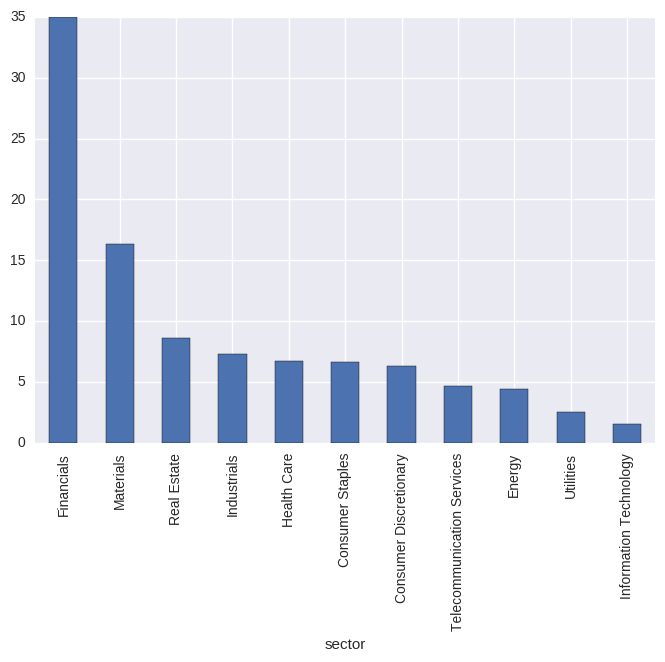

In [10]:
sector_weights = index.groupby(by='sector')['weight'].sum().sort_values(ascending=False)
ax = sector_weights.plot(kind='bar')
print(sector_weights)

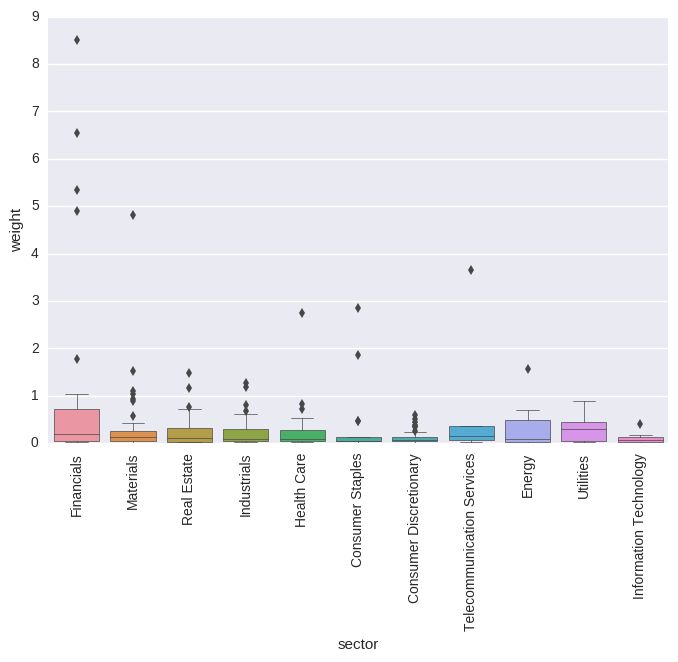

In [11]:
ax = sns.boxplot(data=index, x='sector', y='weight', linewidth=0.5, order=sector_weights.keys())
ax = plt.xticks(rotation=90)

sector
Consumer Discretionary        56
Materials                     52
Real Estate                   35
Financials                    35
Industrials                   30
Health Care                   22
Consumer Staples              22
Information Technology        17
Energy                        15
Utilities                      8
Telecommunication Services     7
Name: weight, dtype: int64


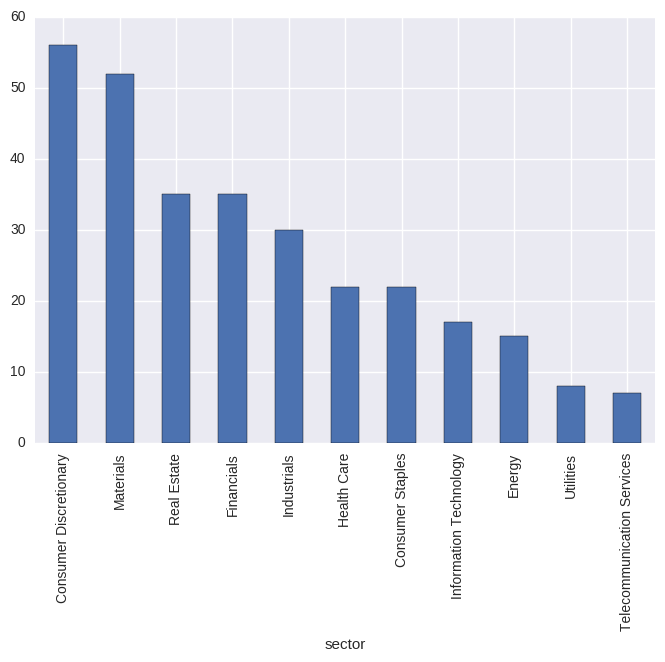

In [12]:
sector_counts = index.groupby(by='sector')['weight'].count().sort_values(ascending=False)
ax = sector_counts.plot(kind='bar')
print(sector_counts)

In [13]:
stocks = index['yahoo_ticker'].values.tolist()
print(stocks)

['A2M.AX', 'AAC.AX', 'AAD.AX', 'ABC.AX', 'ABP.AX', 'ACX.AX', 'ADH.AX', 'AGI.AX', 'AGL.AX', 'AHG.AX', 'AHY.AX', 'AIA.AX', 'AJA.AX', 'AJX.AX', 'ALL.AX', 'ALQ.AX', 'ALU.AX', 'AMA.AX', 'AMC.AX', 'AMP.AX', 'ANN.AX', 'ANZ.AX', 'AOG.AX', 'APA.AX', 'API.AX', 'APN.AX', 'APO.AX', 'AQG.AX', 'ARB.AX', 'ARF.AX', 'ASB.AX', 'AST.AX', 'ASX.AX', 'AVN.AX', 'AWC.AX', 'AWE.AX', 'AYS.AX', 'AZJ.AX', 'BAL.AX', 'BAP.AX', 'BBN.AX', 'BDR.AX', 'BEN.AX', 'BGA.AX', 'BHP.AX', 'BKL.AX', 'BKW.AX', 'BLA.AX', 'BLD.AX', 'BOQ.AX', 'BPT.AX', 'BRG.AX', 'BSL.AX', 'BTT.AX', 'BWP.AX', 'BWX.AX', 'BXB.AX', 'CAB.AX', 'CAR.AX', 'CBA.AX', 'CCL.AX', 'CCP.AX', 'CCV.AX', 'CDD.AX', 'CGC.AX', 'CGF.AX', 'CHC.AX', 'CIM.AX', 'CKF.AX', 'CL1.AX', 'CMW.AX', 'CNU.AX', 'COH.AX', 'CPU.AX', 'CQR.AX', 'CSL.AX', 'CSR.AX', 'CSV.AX', 'CTD.AX', 'CTX.AX', 'CVO.AX', 'CWN.AX', 'CWP.AX', 'CWY.AX', 'CYB.AX', 'DCN.AX', 'DLX.AX', 'DMP.AX', 'DNA.AX', 'DOW.AX', 'DRM.AX', 'DUE.AX', 'DXS.AX', 'ECX.AX', 'EHE.AX', 'ELD.AX', 'EML.AX', 'EPW.AX', 'EQT.AX', 'EVN.AX',

In [14]:
%%time
from pandas_datareader import data
from datetime import datetime, timedelta

# approx 10 years worth of data
n_days = 10 * 365

start = str(datetime.now() - timedelta(days=n_days))[:10]
end = str(datetime.now())[:10]   

panel = data.DataReader(stocks, 'yahoo', start, end)

/home/adrian/miniconda3/envs/sandpit/lib/python3.5/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'WGX.AX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


CPU times: user 3.35 s, sys: 304 ms, total: 3.65 s
Wall time: 2min 22s


In [15]:
help(panel)

Help on Panel in module pandas.core.panel object:

class Panel(pandas.core.generic.NDFrame)
 |  Represents wide format panel data, stored as 3-dimensional array
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (items x major x minor), or dict of DataFrames
 |  items : Index or array-like
 |      axis=0
 |  major_axis : Index or array-like
 |      axis=1
 |  minor_axis : Index or array-like
 |      axis=2
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, default False
 |      Copy data from inputs. Only affects DataFrame / 2d ndarray input
 |  
 |  Method resolution order:
 |      Panel
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      # work only for scalars
 |  
 |  __and__(self, other)
 |      # work only for scalars
 |  
 |  __div__ = __truediv__(self, other)
 |  
 |  __eq__(self, 

In [16]:
panel.describe

<bound method NDFrame.describe of <class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 2602 (major_axis) x 299 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2007-02-02 00:00:00 to 2017-01-27 00:00:00
Minor_axis axis: A2M.AX to WTC.AX>

In [17]:
panel['Adj Close'].head()

,A2M.AX,AAC.AX,AAD.AX,ABC.AX,ABP.AX,ACX.AX,ADH.AX,AGI.AX,AGL.AX,AHG.AX,...,WES.AX,WFD.AX,WGX.AX,WHC.AX,WOR.AX,WOW.AX,WPL.AX,WPP.AX,WSA.AX,WTC.AX
Date,,,,,,,,,,,,,,,,,,,,,
2007-02-02,NaN,1.87014,1.28796,1.26866,6.07736,NaN,NaN,0.64365,9.48962,1.010,...,18.95938,5.39139,NaN,NaN,14.304,13.62088,21.30007,1.08340,3.47162,NaN
2007-02-05,NaN,1.85250,1.29722,1.23613,6.01566,NaN,NaN,0.64793,9.45753,1.049,...,18.82664,5.41058,NaN,NaN,14.404,13.71637,21.59560,1.09355,3.37370,NaN
2007-02-06,NaN,1.96717,1.27406,1.25007,6.00023,NaN,NaN,0.60074,9.43081,1.010,...,18.84628,5.41537,NaN,NaN,14.738,13.91858,21.39101,1.09694,3.31139,NaN
2007-02-07,NaN,2.07304,1.29722,1.28260,6.01566,NaN,NaN,0.63506,9.31325,1.030,...,18.68402,5.54709,NaN,NaN,15.106,14.07587,20.99886,1.08340,3.36480,NaN
2007-02-08,NaN,2.02893,1.31112,1.28260,6.01566,NaN,NaN,0.59215,9.31325,1.010,...,18.65943,5.70077,NaN,NaN,15.106,14.28370,20.76017,1.06985,3.32920,NaN


In [18]:
panel['Adj Close'].tail()

,A2M.AX,AAC.AX,AAD.AX,ABC.AX,ABP.AX,ACX.AX,ADH.AX,AGI.AX,AGL.AX,AHG.AX,...,WES.AX,WFD.AX,WGX.AX,WHC.AX,WOR.AX,WOW.AX,WPL.AX,WPP.AX,WSA.AX,WTC.AX
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-23,2.06,1.595,2.10,5.14,2.79,5.55,1.485,1.940,22.33,3.92,...,40.97,8.93,NaN,2.79,9.51,24.60,32.17,1.150,2.41,5.27
2017-01-24,2.04,1.590,2.08,5.16,2.85,5.57,1.485,1.895,22.41,3.93,...,41.20,9.03,NaN,2.93,9.75,24.80,31.96,1.170,2.42,5.25
2017-01-25,2.10,1.600,2.07,5.16,2.82,5.44,1.480,1.850,22.24,3.92,...,40.70,8.91,NaN,2.95,9.99,24.65,32.08,1.155,2.57,5.29
2017-01-26,2.10,1.600,2.07,5.16,2.82,5.44,1.480,1.850,22.24,3.92,...,40.70,8.91,NaN,2.95,9.99,24.65,32.08,1.155,2.57,5.29
2017-01-27,2.11,1.595,2.10,5.20,2.86,5.65,1.480,1.815,22.66,4.01,...,41.12,8.96,NaN,2.89,10.16,25.16,32.31,1.140,2.53,5.20


In [19]:
panel['Volume'].head()

,A2M.AX,AAC.AX,AAD.AX,ABC.AX,ABP.AX,ACX.AX,ADH.AX,AGI.AX,AGL.AX,AHG.AX,...,WES.AX,WFD.AX,WGX.AX,WHC.AX,WOR.AX,WOW.AX,WPL.AX,WPP.AX,WSA.AX,WTC.AX
Date,,,,,,,,,,,,,,,,,,,,,
2007-02-02,NaN,298600.0,1277300.0,662700.0,97200.0,NaN,NaN,510100.0,835900.0,5000.0,...,748600.0,13891400.0,NaN,NaN,406900.0,1777900.0,2042000.0,757300.0,3736300.0,NaN
2007-02-05,NaN,1367100.0,68700.0,684900.0,131800.0,NaN,NaN,599900.0,418000.0,52500.0,...,725700.0,10693200.0,NaN,NaN,437300.0,1298300.0,1628400.0,686700.0,828000.0,NaN
2007-02-06,NaN,965800.0,909300.0,565200.0,330300.0,NaN,NaN,140100.0,554700.0,20300.0,...,920600.0,17519400.0,NaN,NaN,628500.0,2363300.0,1437300.0,424100.0,650400.0,NaN
2007-02-07,NaN,1101800.0,481500.0,595900.0,258800.0,NaN,NaN,206800.0,634800.0,1000.0,...,730500.0,13225000.0,NaN,NaN,996500.0,5756700.0,2785100.0,239400.0,376100.0,NaN
2007-02-08,NaN,1278300.0,272700.0,791900.0,572300.0,NaN,NaN,182700.0,715900.0,33000.0,...,670300.0,16526500.0,NaN,NaN,0.0,2535600.0,2737200.0,835500.0,1289300.0,NaN


In [28]:
# pct_change by default fills forward where values don't exist
panel['returns'] = panel['Adj Close'].pct_change()
panel['returns'].head()

,A2M.AX,AAC.AX,AAD.AX,ABC.AX,ABP.AX,ACX.AX,ADH.AX,AGI.AX,AGL.AX,AHG.AX,...,WES.AX,WFD.AX,WGX.AX,WHC.AX,WOR.AX,WOW.AX,WPL.AX,WPP.AX,WSA.AX,WTC.AX
Date,,,,,,,,,,,,,,,,,,,,,
2007-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-05,NaN,-0.009432,0.007190,-0.025641,-0.010152,NaN,NaN,0.006650,-0.003382,0.038614,...,-0.007001,0.003559,NaN,NaN,0.006991,0.007011,0.013875,0.009369,-0.028206,NaN
2007-02-06,NaN,0.061900,-0.017854,0.011277,-0.002565,NaN,NaN,-0.072832,-0.002825,-0.037178,...,0.001043,0.000885,NaN,NaN,0.023188,0.014742,-0.009474,0.003100,-0.018469,NaN
2007-02-07,NaN,0.053818,0.018178,0.026023,0.002572,NaN,NaN,0.057130,-0.012466,0.019802,...,-0.008610,0.024323,NaN,NaN,0.024969,0.011301,-0.018332,-0.012343,0.016129,NaN
2007-02-08,NaN,-0.021278,0.010715,0.000000,0.000000,NaN,NaN,-0.067568,0.000000,-0.019417,...,-0.001316,0.027705,NaN,NaN,0.000000,0.014765,-0.011367,-0.012507,-0.010580,NaN


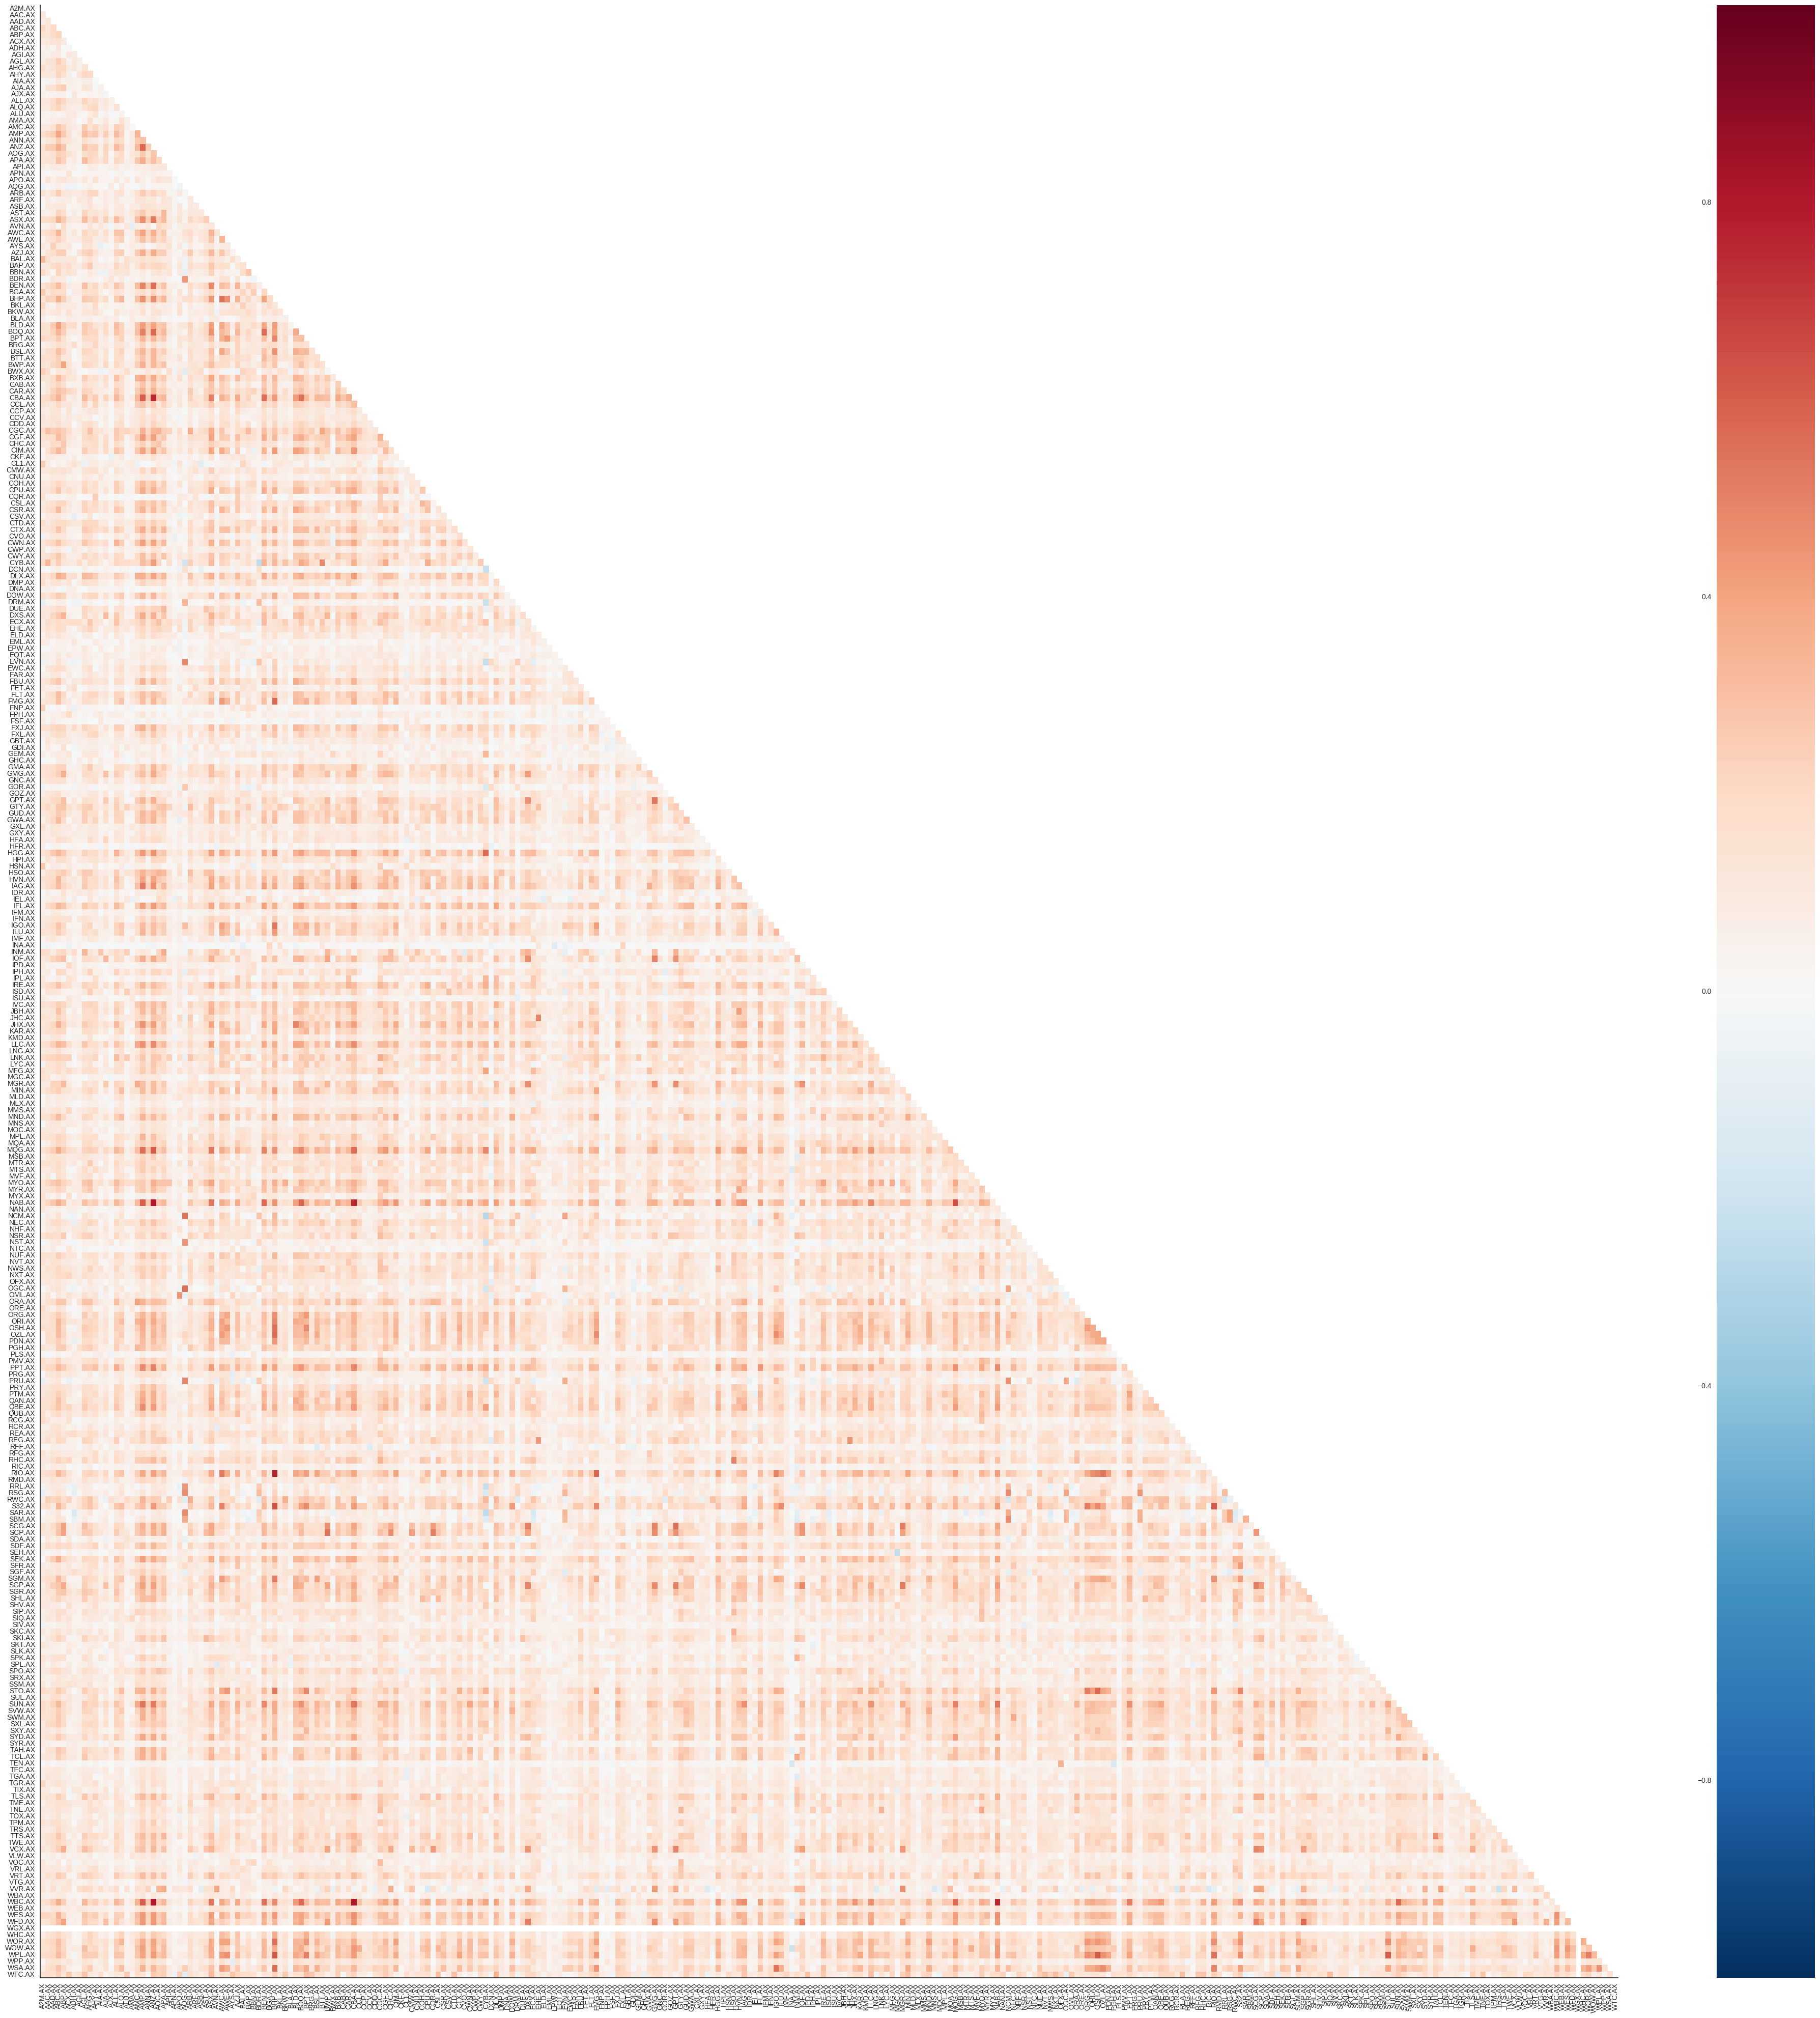

In [29]:
corr = panel['returns'].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50, 50))
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmin=-1, vmax=1)
    sns.despine()

In [30]:
# cumulative log returns
return_index = ((panel['returns']).cumsum() * 100) + 100
# vami = (df_doy.cumsum() * 100) + 100
return_index

,A2M.AX,AAC.AX,AAD.AX,ABC.AX,ABP.AX,ACX.AX,ADH.AX,AGI.AX,AGL.AX,AHG.AX,...,WES.AX,WFD.AX,WGX.AX,WHC.AX,WOR.AX,WOW.AX,WPL.AX,WPP.AX,WSA.AX,WTC.AX
Date,,,,,,,,,,,,,,,,,,,,,
2007-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-05,NaN,99.056755,100.718966,97.435877,98.984757,NaN,NaN,100.664958,99.661841,103.861386,...,99.299872,100.355938,NaN,NaN,100.699105,100.701056,101.387460,100.936865,97.179415,NaN
2007-02-06,NaN,105.246769,98.933610,98.563590,98.728259,NaN,NaN,93.381763,99.379315,100.143560,...,99.404192,100.444468,NaN,NaN,103.017905,102.175280,100.440091,101.246865,95.332481,NaN
2007-02-07,NaN,110.628612,100.751421,101.165845,98.985416,NaN,NaN,99.094718,98.132762,102.123758,...,98.543226,102.876804,NaN,NaN,105.514852,103.305352,98.606845,100.012522,96.945399,NaN
2007-02-08,NaN,108.500819,101.822943,101.165845,98.985416,NaN,NaN,92.337876,98.132762,100.182010,...,98.411616,105.647266,NaN,NaN,105.514852,104.781851,97.470164,98.761830,95.887387,NaN
2007-02-09,NaN,104.153207,103.590134,101.890155,98.985416,NaN,NaN,95.237479,98.706676,102.162208,...,98.938642,106.082119,NaN,NaN,105.514852,106.040278,98.236728,99.394629,98.293670,NaN
2007-02-12,NaN,104.153207,104.978888,103.329132,98.985416,NaN,NaN,93.123647,99.105749,101.385509,...,98.440715,105.995665,NaN,NaN,105.514852,105.146992,98.127977,97.508169,96.988128,NaN
2007-02-13,NaN,103.244266,104.978888,103.329132,96.421275,NaN,NaN,95.283127,98.253885,102.168288,...,98.941134,105.995665,NaN,NaN,105.514852,105.303749,97.393550,97.828151,98.839946,NaN
2007-02-14,NaN,104.161544,102.581673,106.520329,95.368627,NaN,NaN,93.874999,98.024691,105.954696,...,99.727795,105.258855,NaN,NaN,126.307915,105.303749,99.311441,98.467961,98.320558,NaN


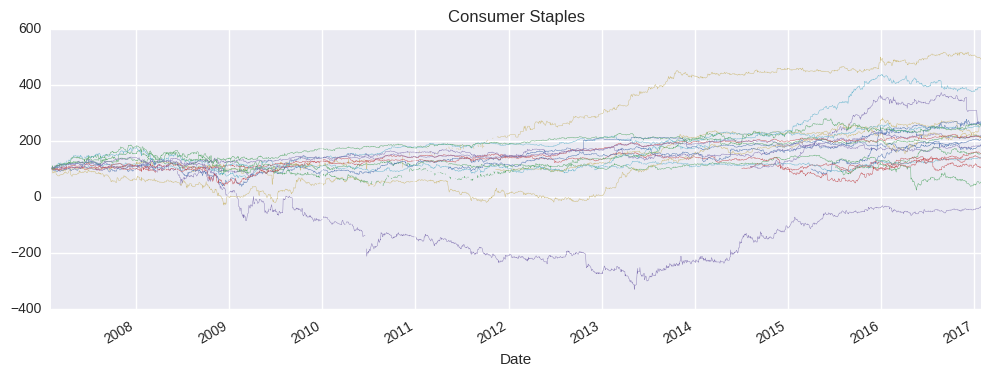

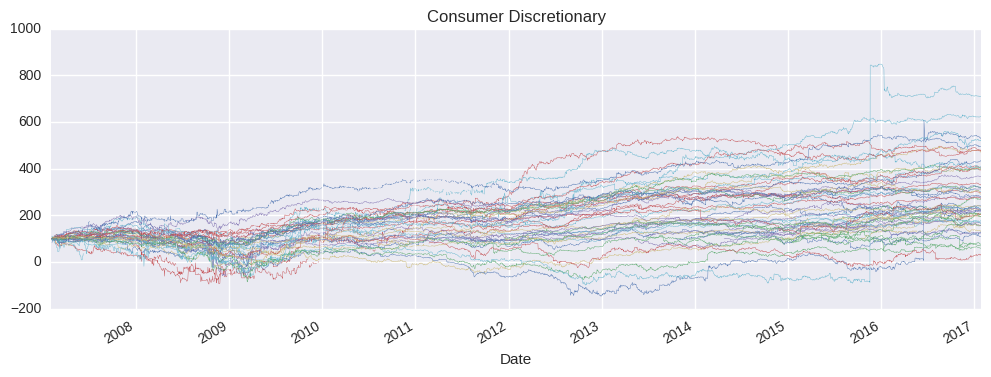

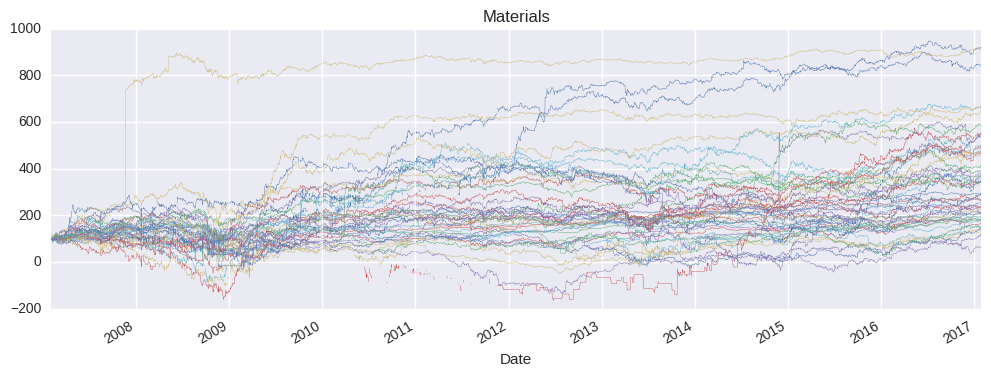

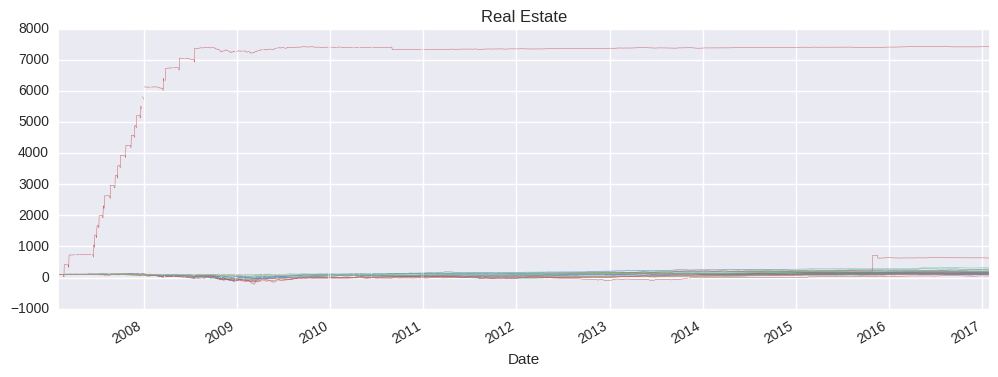

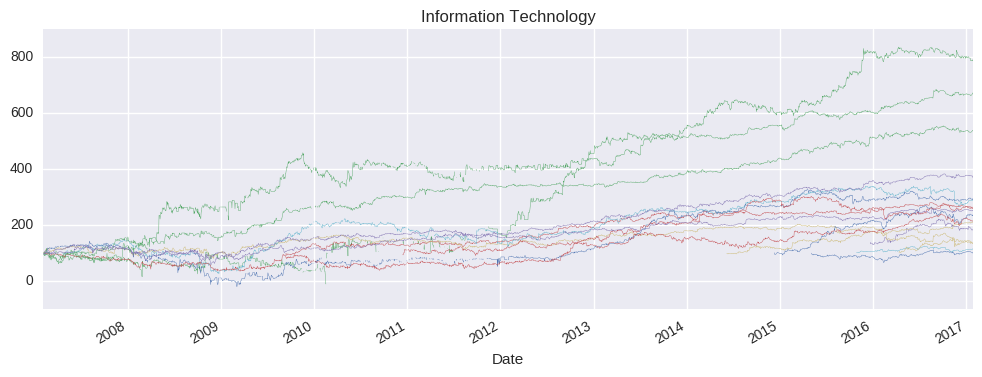

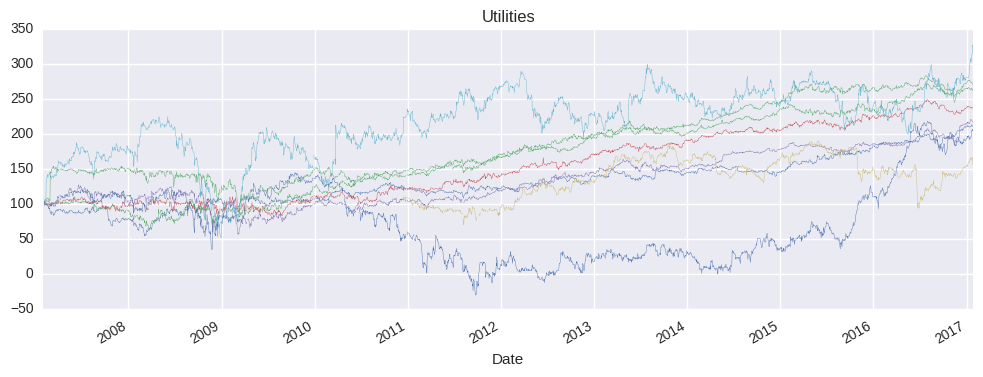

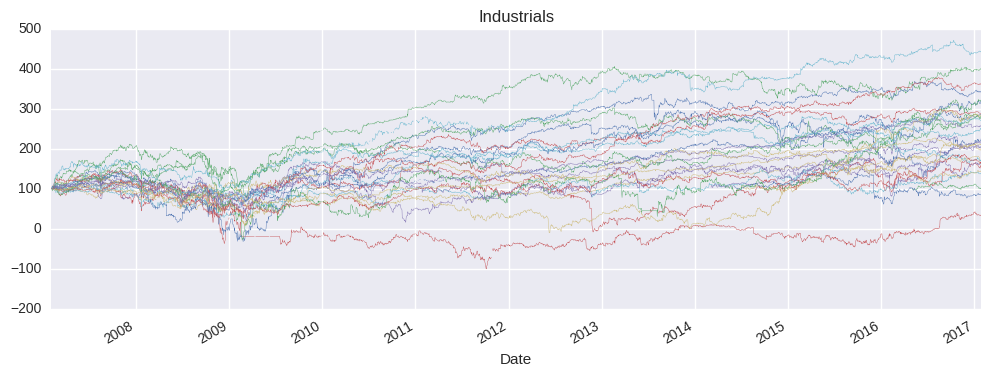

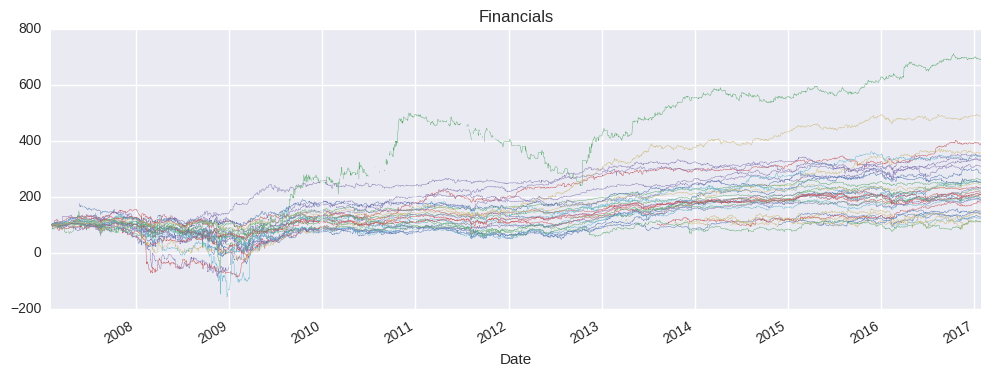

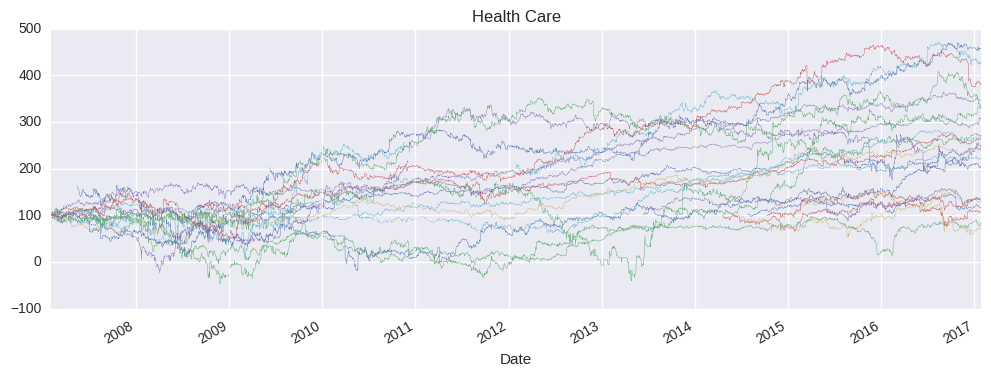

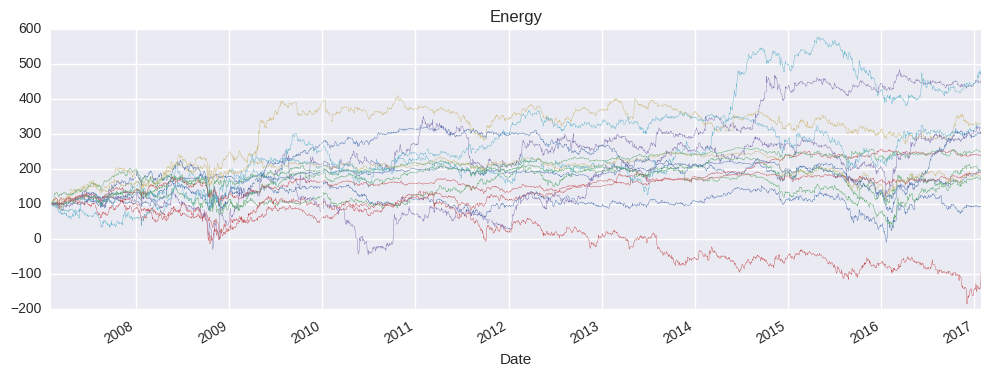

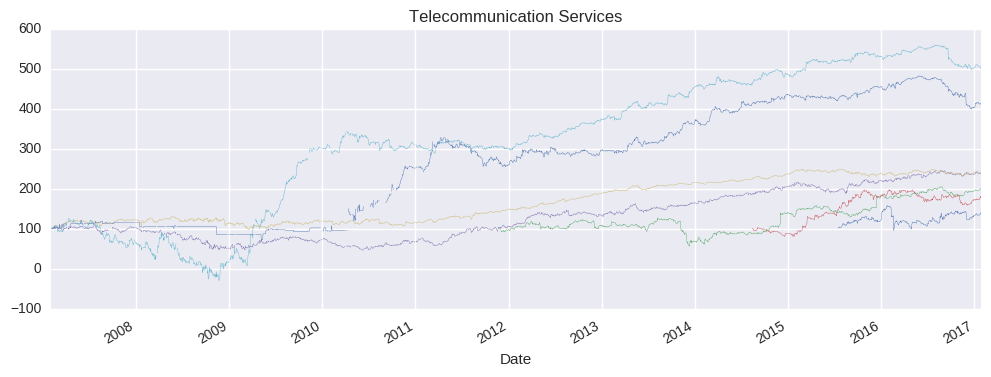

In [31]:
# lets review the returns profile of each stock, grouping by sector
for sector in sectors:
    tickers = index[index['sector'] == sector]['yahoo_ticker']
    
    ax = return_index[tickers].plot(
            figsize=(12,4)
            ,linewidth=0.3
            ,legend=False
            ,title=sector)
    ax

In [34]:
return_index = return_index.ix[:, return_index.lt(0).any()]

# lets review the returns profile of each stock, grouping by sector
for sector in sectors:
    tickers = index[index['sector'] == sector]['yahoo_ticker']
    
    ax = return_index[tickers].plot(
            figsize=(12,4)
            ,linewidth=0.3
            ,legend=False
            ,title=sector)
    ax

KeyError: "['A2M.AX' 'AAC.AX' 'AHY.AX' 'BAL.AX' 'BGA.AX' 'BKL.AX' 'BWX.AX' 'CCL.AX'\n 'CGC.AX' 'FNP.AX' 'FSF.AX' 'GNC.AX' 'MGC.AX' 'MTS.AX' 'RIC.AX' 'TGR.AX'\n 'TWE.AX' 'WBA.AX' 'WES.AX' 'WOW.AX'] not in index"